<a href="https://colab.research.google.com/github/hydrationn/Machine-DeepLearning/blob/main/DeepLearning/assignment/%EA%B3%BC%EC%A0%9C6_1_Generative_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autoencoder

In [2]:
# Import package

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# GPU/CPU setting

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

cuda


In [4]:
# import dataset

fashion_train = datasets.FashionMNIST("../image_data/FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
fashion_test = datasets.FashionMNIST("../image_data/FashionMNIST", train=False, download=True, transform=transforms.ToTensor())

fashion_train.data = fashion_train.data/255.0
fashion_train.targets = fashion_train.targets
fashion_test.data = fashion_test.data/255.0
fashion_test.targets = fashion_test.targets

100%|██████████| 26421880/26421880 [00:05<00:00, 4526979.20it/s] 


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270869.95it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5080743.45it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5394023.73it/s]


Extracting ../image_data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../image_data/FashionMNIST/FashionMNIST/raw



tensor(0)


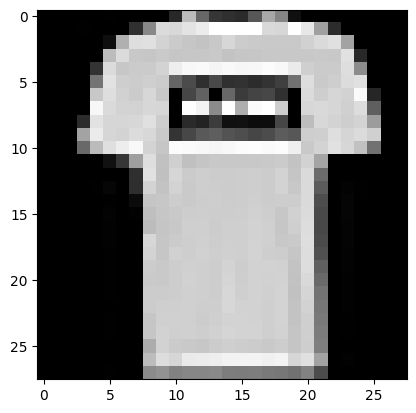

In [5]:
# Import dataset

plt.imshow(fashion_train.data[1], cmap="gray")
print(fashion_train.targets[1])

In [6]:
# Batch generation

batch_size = 256

train_loader = torch.utils.data.DataLoader(fashion_train.data, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = torch.utils.data.DataLoader(fashion_test.data, batch_size=len(fashion_test.data), shuffle=False, drop_last=False)

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 16),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        reconstructed = self.decoder(z)
        return reconstructed

In [8]:
model = Autoencoder().to(device)

In [9]:
# Parameter, loss function, optimizer

# Hyperparameters

num_epochs = 10
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# Model Train

loss_list = []

for epoch_num in range(num_epochs):
  average_cost = 0

  for batch_idx, images in enumerate(train_loader):
    num_of_mini_batch = len(train_loader)

    images = images.to(device)
    input_image = images.reshape(-1, 28*28)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, input_image)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 0.060991
Epoch 2 Loss 0.027403
Epoch 3 Loss 0.023707
Epoch 4 Loss 0.021997
Epoch 5 Loss 0.020403
Epoch 6 Loss 0.019255
Epoch 7 Loss 0.018501
Epoch 8 Loss 0.017861
Epoch 9 Loss 0.017376
Epoch 10 Loss 0.016954


In [11]:
# Test

for batch_idx, image in enumerate(test_loader):
  with torch.no_grad():
    test_img = image.reshape(-1, 784).to(device)
    test_recon_x = model(test_img)

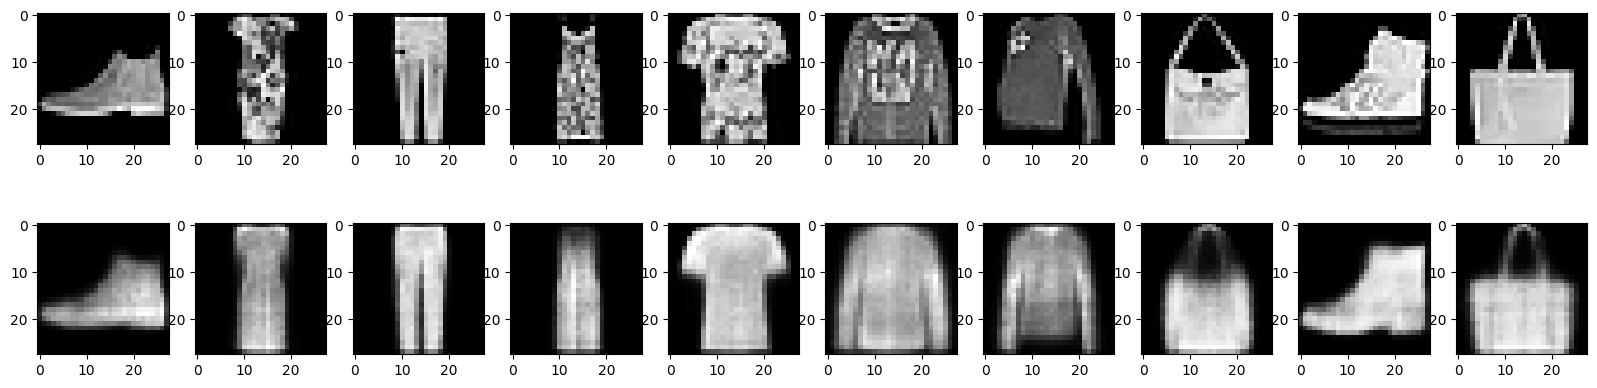

In [12]:
n = 10
plt.figure(figsize=(20,5))

for i in range(n):
  ax = plt.subplot(2, 10, i + 1)
  test_img = image[i*100].to(device)
  plt.imshow(test_img.cpu(), cmap='gray')

  ax = plt.subplot(2, 10, i+1+n)
  recon_image = test_recon_x.data[i*100].reshape(28, 28)
  plt.imshow(recon_image.cpu(),cmap='gray')